# this is used for sleep staging.
We have to make sure that the starting timestamps and labels are aligned

In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [130]:
destSleepPath = '/well/doherty/users/cxx579/project_data/raine/gen1_26/allSleepTime.csv'
sleepDf = pd.read_csv(destSleepPath)

In [131]:
sleepDf

,Unnamed: 0,subject_id,start_time,end_time,epoch_path,epoch_start_time,epoch_end_time
0,0,830928,2017-04-17 22:29:14,2017-04-18 05:26:14,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2017-04-17 18:00:00.033+0800 [Australia/Perth],2017-04-18 17:59:30.033+0800 [Australia/Perth]
1,1,342948,2016-11-30 21:59:31,2016-12-01 05:06:01,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2016-11-30 18:00:00.033+0800 [Australia/Perth],2016-12-01 17:59:30.033+0800 [Australia/Perth]
2,2,343364,2016-05-26 22:05:51,2016-05-27 05:30:51,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2016-05-26 18:00:00.033+0800 [Australia/Perth],2016-05-27 17:59:30.033+0800 [Australia/Perth]
3,3,788310,2017-01-30 21:45:11,2017-01-31 06:20:41,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2017-01-30 18:00:00.033+0800 [Australia/Perth],2017-01-31 17:59:30.033+0800 [Australia/Perth]
4,4,906975,2015-10-29 22:23:09,2015-10-30 05:45:09,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2015-10-29 18:00:00.033+0800 [Australia/Perth],2015-10-30 17:59:30.033+0800 [Australia/Perth]
...,...,...,...,...,...,...,...
1014,996,183043,2016-11-08 21:56:31,2016-11-09 05:52:01,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2016-11-08 18:00:00.033+0800 [Australia/Perth],2016-11-09 17:59:30.033+0800 [Australia/Perth]
1015,997,281230,2016-06-17 22:30:51,2016-06-18 06:09:21,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2016-06-17 18:00:00.033+0800 [Australia/Perth],2016-06-18 17:59:30.033+0800 [Australia/Perth]
1016,998,163041,2017-02-08 22:14:55,2017-02-09 06:02:55,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2017-02-08 18:00:00.033+0800 [Australia/Perth],2017-02-09 17:59:30.033+0800 [Australia/Perth]
1017,999,369218,2016-12-12 22:14:48,2016-12-13 06:01:18,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2016-12-12 18:00:00.033+0800 [Australia/Perth],2016-12-13 17:59:30.033+0800 [Australia/Perth]


# Find the threshold for good quality wear time 

In [132]:
sleepDf['start_time'] = pd.to_datetime(sleepDf['start_time'], format='%Y-%m-%d %H:%M:%S')
sleepDf['end_time'] = pd.to_datetime(sleepDf['end_time'], format='%Y-%m-%d %H:%M:%S')

In [136]:
sleepDf['sleep_duration'] = sleepDf['end_time'] - sleepDf['start_time']

In [134]:
sleepDf['sleep_duration'] = sleepDf['sleep_duration'].astype('timedelta64[h]')

In [137]:
sleepDf[sleepDf['sleep_duration'] > timedelta(hours=12)]

,Unnamed: 0,subject_id,start_time,end_time,epoch_path,epoch_start_time,epoch_end_time,sleep_duration


In [139]:
sleepDf['sleep_duration'].isnull().values.any()

False

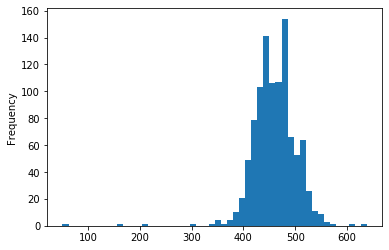

In [143]:
sleepDf['sleep_duration'].astype('timedelta64[m]').plot.hist(bins=50)

In [13]:
# # Modify command line script
def extract_file_name(command_str):
    file_path = command_str.split(' ')
    file_path = file_path[2]
    file_path = file_path[1:]
    file_path = file_path[:-1] # remove quotation marks

    return file_path.split("/")[-1]

In [14]:
def get_subjectID(file_name):
    return file_name.split('_')[0]

In [20]:
my_id = get_subjectID('830928_wrist_2016-01-18.gt3x')

In [24]:
result = sleepDf[sleepDf['subject_id'] == int(my_id)]

In [62]:
my_start_time = result.iloc[0]['start_time']
my_end_time = result.iloc[0]['end_time']

In [63]:
my_start_time = datetime.strptime(my_start_time, '%Y-%m-%d %H:%M:%S')
my_end_time = datetime.strptime(my_end_time, '%Y-%m-%d %H:%M:%S')
my_end_time = my_end_time + timedelta(minutes=2)

my_start_time = my_start_time.strftime('%Y-%m-%dT%H:%M')
my_end_time = my_end_time.strftime('%Y-%m-%dT%H:%M')

In [11]:
data_dir = '/well/doherty/projects/raine/gen1_26/gt3x/wrist'
script_dir ='/well/doherty/users/cxx579/test_process/myBBAA/process-raine-gen1-cmds.txt'
dest_script_dir = '/well/doherty/users/cxx579/test_process/myBBAA/process-raine-gen1-cmds-final.txt'
sleep_time_dir ='/well/doherty/users/cxx579/project_data/raine/gen1_26/allSleepTime.csv'
missing_file_dir = data_dir + "filesWithoutLabels.pkl"

## Modify command line script
def extract_file_name(command_str):
    file_path = command_str.split(' ')
    file_path = file_path[2]
    file_path = file_path[1:]
    file_path = file_path[:-1] # remove quotation marks

    return file_path.split("/")[-1]

In [7]:

def get_subjectID(file_name):
    return file_name.split('_')[0]


sleepDf = pd.read_csv(sleep_time_dir)
f = open(script_dir, "r")
k = 0


In [8]:
missing_sleep_labels = []
with open(dest_script_dir, 'a') as dest_f:
    for x in f:
        my_file_name = extract_file_name(x)
        my_id = get_subjectID(my_file_name)
        result = sleepDf[sleepDf['subject_id'] == int(my_id)]

        if (len(result) == 0):
            missing_sleep_labels.append(my_file_name)
            continue
        my_start_time = result.iloc[0]['start_time']
        my_end_time = result.iloc[0]['end_time']
        
        my_start_time = datetime.strptime(my_start_time, '%Y-%m-%d %H:%M:%S')
        my_end_time = datetime.strptime(my_end_time, '%Y-%m-%d %H:%M:%S')
        my_end_time = my_end_time + timedelta(minutes=2)

        my_start_time = my_start_time.strftime('%Y-%m-%dT%H:%M')
        my_end_time = my_end_time.strftime('%Y-%m-%dT%H:%M')
        x = x[:-1] # remove line break
        x = x + ' --startTime ' + my_start_time
        x = x + ' --endTime ' + my_end_time + '\n'
        dest_f.write(x)

In [10]:

len(missing_sleep_labels)

47